In [2]:
#Declare the libraries needed
import tweepy 
import pandas as pd
import sys
import csv
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from PIL import Image
import pandas_profiling
import twitter
#api = twitter.api(consumer_key='YLSBZeZ5ytLD8u1ZLgmWs7jeU',
    #                   access_token_key='1117266834653241346-3VBwsLFoSsHu4Rm7bVlERRmDun4UED',
  #                    access_token_secret='8QboAOWWEVWYgyP8Dh16CoDjakXpp1FkcU4AKY1MbuGgP')
  
# Function to extract tweets 
def get_tweets(username): 
          
        # Authorization to consumer key and consumer secret 
        auth = tweepy.OAuthHandler('OOfdIdKyYHvjqPs93AhLIfnat', 'VWIcE45bB2UpSj3nRGGHvBA2QjLg0Yf0nVm0reT4UkwmwPTK2v') 
  
        # Access to user's access key and access secret 
        auth.set_access_token('1153845346583232513-mQHLL0JlPpqy9ZLzTLLRHMnBxo019F', 'IZXHyAdQD8sbAypZOzLBz70xPEXd1v0i9yLZUy106EJz4') 
  
        # Calling api 
        api = tweepy.API(auth) 
        #set count to however many tweets you want - max count is 3200 and this doesn't have any effect if it is more than 3200
#        number_of_tweets = 5000
       
        tfile = []
        for tweet in tweepy.Cursor(api.user_timeline, screen_name = username).items():
            tfile.append([len(tweet.text), username, tweet.id_str,tweet.source, tweet.created_at,tweet.retweet_count,tweet.favorite_count, tweet.text.encode("utf-8")])

	#write to a new csv file from the array of tweets
        outfile = username + "_tweets_V14.csv"
        print ("writing to " + outfile)
        with open(outfile, 'w+') as file:
            writer = csv.writer(file, delimiter=',')
            writer.writerow(['len','User_Name', 'Tweet_ID', 'Source', 'Created_date','Retweet_count','Favorite_count','Text',])
            writer.writerows(tfile)
# user name
get_tweets("@CNNIndonesia")  

writing to @CNNIndonesia_tweets_V14.csv


In [4]:
#Read the file and also assign it to dataframe
import tweepy 
import pandas as pd
import sys
import csv
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from PIL import Image
import pandas_profiling
import twitter
import numpy as np
import nltk
import warnings 

import string

bg= pd.read_csv("@CNNIndonesia_tweets_V14.csv",encoding='utf-8') 
bg.head()

,len,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Text
0,84,@CNNIndonesia,1162995846817837056,detikcommunity,2019-08-18 07:53:11,2,2,"b'Roller Coaster Tak Berhenti Meluncur, Empat ..."
1,82,@CNNIndonesia,1162993818892787713,detikcommunity,2019-08-18 07:45:08,0,7,b'Kiper Tottenham Menilai Gol Man City yang Di...
2,74,@CNNIndonesia,1162992548169654273,detikcommunity,2019-08-18 07:40:05,1,1,b'Memandang Perempuan Berkebaya dari Kacamata ...
3,58,@CNNIndonesia,1162991279384326145,detikcommunity,2019-08-18 07:35:02,1,6,"b'Gempa 5,1 SR Guncang Rote Ndao NTT https://t..."
4,80,@CNNIndonesia,1162990009986605057,detikcommunity,2019-08-18 07:30:00,1,3,b'MPR Tegaskan Konstitusi Dirancang untuk Bata...


In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [6]:
# remove twitter handles (@user)
bg['tidy_tweet'] = np.vectorize(remove_pattern)(bg['Text'], "@[\w]*")
bg['tidy_tweet'] = bg['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
bg['tidy_tweet'] = bg['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
bg.head()

,len,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Text,tidy_tweet
0,84,@CNNIndonesia,1162995846817837056,detikcommunity,2019-08-18 07:53:11,2,2,"b'Roller Coaster Tak Berhenti Meluncur, Empat ...",Roller Coaster Berhenti Meluncur Empat Anak Ja...
1,82,@CNNIndonesia,1162993818892787713,detikcommunity,2019-08-18 07:45:08,0,7,b'Kiper Tottenham Menilai Gol Man City yang Di...,Kiper Tottenham Menilai City yang Dianulir htt...
2,74,@CNNIndonesia,1162992548169654273,detikcommunity,2019-08-18 07:40:05,1,1,b'Memandang Perempuan Berkebaya dari Kacamata ...,Memandang Perempuan Berkebaya dari Kacamata Le...
3,58,@CNNIndonesia,1162991279384326145,detikcommunity,2019-08-18 07:35:02,1,6,"b'Gempa 5,1 SR Guncang Rote Ndao NTT https://t...",Gempa Guncang Rote Ndao https sUhEZ haGg
4,80,@CNNIndonesia,1162990009986605057,detikcommunity,2019-08-18 07:30:00,1,3,b'MPR Tegaskan Konstitusi Dirancang untuk Bata...,Tegaskan Konstitusi Dirancang untuk Batasi Kek...


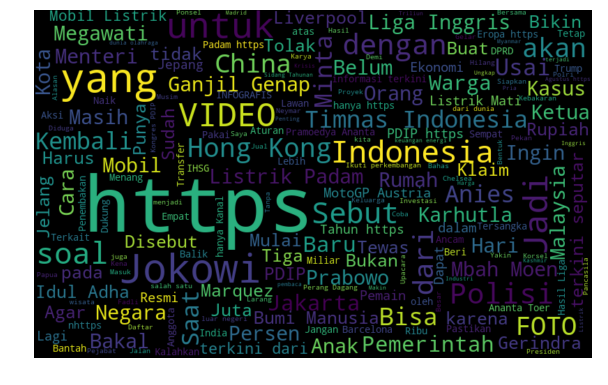

In [15]:
all_words = ' '.join([text for text in bg['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

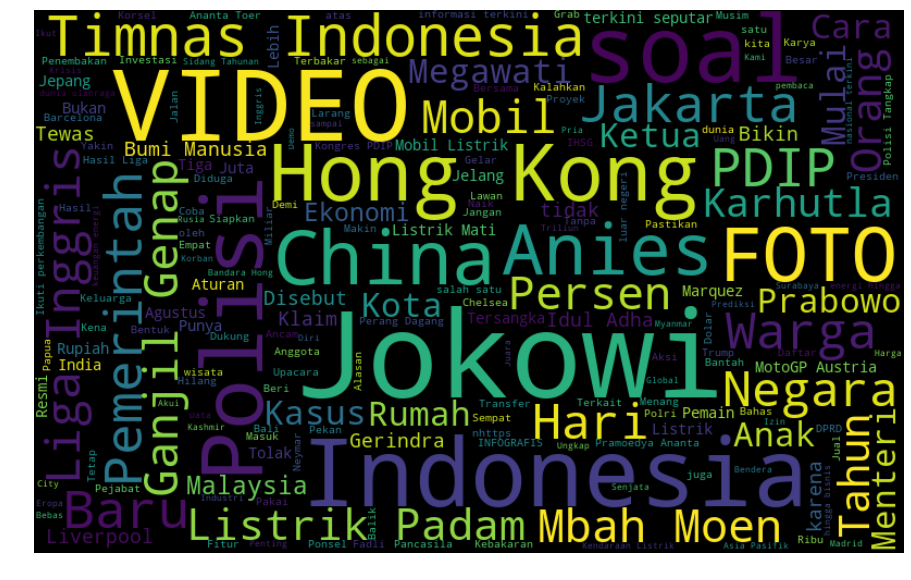

In [16]:
all_words = ' '.join([text for text in bg['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords=["https","yang","untuk","akan","buat","saya","jadi","dari","sebut","saat","bakal","agar","lagi","ingin","dalam","hanya","dapat","sudah","pada","bisa","masih","dengan","kembali","belum","usai","minta","harus"]).generate(all_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()